<a href="https://colab.research.google.com/github/Theedon/MLAlgos/blob/main/ShallowFCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from typing import Any

class ShallowNN():


  def __init__(self, X: np.ndarray, y:np.ndarray, layer_1_size: int = 5, layer_2_size: int = 4, output_size: int = 1):
    self.X, self.y = X, y
    self.m = X.shape[1]

    self.W1 = np.random.randn(layer_1_size, X.shape[0]) * np.sqrt(2/X.shape[0])
    self.W2 = np.random.randn(layer_2_size, layer_1_size) * np.sqrt(2/layer_1_size)
    self.W3 = np.random.randn(output_size, layer_2_size) * np.sqrt(2/layer_2_size)

    self.b1  = np.zeros((layer_1_size, 1))
    self.b2 = np.zeros((layer_2_size, 1))
    self.b3 = np.zeros((output_size, 1))

    self.Z1, self.Z2, self.Z3  = np.ndarray(()), np.ndarray(()), np.ndarray(())
    self.A1, self.A2, self.A3  = np.ndarray(()), np.ndarray(()), np.ndarray(())
    self.cost = 0
    self.losses: dict[int, float] = {}
    self.accuracies: dict[int, Any] = {}


  def activate(self, Z, func="relu"):
    if func == "relu":
      return np.maximum(0, Z)
    elif func == "sigmoid":
      return 1 / (1 + np.exp(-Z))
    elif func == "tanh":
      return np.tanh(Z)

    return Z

  def forward_pass(self):
    self.Z1 = np.dot(self.W1, self.X) + self.b1
    self.A1 = self.activate(self.Z1, func="relu")

    self.Z2 = np.dot(self.W2, self.A1) + self.b2
    self.A2 = self.activate(self.Z2, func="relu")

    self.Z3 = np.dot(self.W3, self.A2) + self.b3
    self.A3 = self.activate(self.Z3, func="sigmoid")

  def calculate_loss(self, y, yhat, m: int):
    epsilon = 1e-8
    yhat = np.clip(yhat, epsilon, 1-epsilon)
    cost = -np.sum((y * np.log(yhat)) + ((1 - y) * np.log(1 - yhat)))/m
    return cost

  def backward_pass(self, learning_rate: float):
    self.cost = self.calculate_loss(self.y, self.A3, self.m)
    dZ3 = self.A3 - self.y
    dW3 = np.dot(dZ3, self.A2.T)/self.m
    db3 = np.sum(dZ3, keepdims=True, axis=1)/self.m

    dZ2 = np.dot(self.W3.T, dZ3) * (self.A2 > 0).astype(int)
    dW2 = np.dot(dZ2,  self.A1.T)/self.m
    db2 = np.sum(dZ2, keepdims = True, axis=1)/self.m

    dZ1 = np.dot(self.W2.T,  dZ2) *  (self.A1 > 0).astype(int)
    dW1 = np.dot(dZ1, self.X.T)/self.m
    db1 = np.sum(dZ1, keepdims=True,  axis=1)/self.m

    self.W3 -= learning_rate * dW3
    self.b3 -= learning_rate * db3

    self.W2 -= learning_rate * dW2
    self.W1 -= learning_rate * dW1

    self.b2 -= learning_rate * db2
    self.b1 -= learning_rate * db1

  def fit(self, learning_rate: float=0.01, n_iters: int = 10000,  verbose=True):
    for i in range(n_iters):
      self.forward_pass()
      self.backward_pass(learning_rate=learning_rate)

      if i % 100 == 0:
        self.losses[i] = self.cost
        predictions = (self.A3 > 0.5).astype(int)
        self.accuracies[i] = np.mean(predictions == self.y) * 100

        if verbose:
          print(f"loss after {i} iterations is {self.cost}")
    print("model trained successfully")

  def plot_curves(self):
    loss_x = np.array([key for key in self.losses.keys()])
    loss_y = np.array([value for value in self.losses.values()])
    fig, ax = plt.subplots(2,1, figsize=(10,8))
    ax[0].set_title("Loss Curve")
    ax[0].set_xlabel("training iteration")
    ax[0].set_ylabel("training loss")
    ax[0].grid()
    ax[0].plot(loss_x,loss_y)

    accuracy_x = np.array([key for key in self.accuracies.keys()])
    accuracy_y = np.array([value for value in self.accuracies.values()])
    ax[1].set_title("Accuracy Curve")
    ax[1].set_xlabel("training iteration")
    ax[1].set_ylabel("training loss")
    ax[1].grid()
    ax[1].plot(accuracy_x,accuracy_y)

    fig.tight_layout()
    fig.suptitle("Training Visualizations")
    fig.show()
    fig.savefig("plot.jpg")



  def predict(self, X: np.ndarray):
    Z1 = np.dot(self.W1, X) + self.b1
    A1 = self.activate(Z1, func="relu")

    Z2 = np.dot(self.W2, A1) + self.b2
    A2 = self.activate(Z2, func="relu")

    Z3 = np.dot(self.W3, A2) + self.b3
    A3 = self.activate(Z3, func="sigmoid")

    return (A3 > 0.5).astype(int)

In [2]:
def accuracy_score(y, yhat):
    # Ensure the prediction and the true labels are compared element-wise
    accuracy = np.mean(yhat == y_test) * 100
    return accuracy

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

# simple data generation
X = np.random.rand(2, 500)  # 500 samples, 2 features
y = (np.sum(X, axis=0) > 1).astype(int).reshape(1, 500)  # Binary target

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X.T, y.T, test_size=0.2, random_state=42)

X_train, X_test = X_train.T, X_test.T
y_train, y_test = y_train.T, y_test.T

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2, 400)
y_train shape: (1, 400)
X_test shape: (2, 100)
y_test shape: (1, 100)


In [4]:
# initialize model
model =  ShallowNN(X_train, y_train, layer_1_size= 5, layer_2_size= 4, output_size= 1)

model.fit(learning_rate=0.01, n_iters=10000, verbose=True)

loss after 0 iterations is 1.4276104951607504
loss after 100 iterations is 0.6967954120277252
loss after 200 iterations is 0.6927827700160387
loss after 300 iterations is 0.6914702195555901
loss after 400 iterations is 0.6909565554210153
loss after 500 iterations is 0.6907095138707278
loss after 600 iterations is 0.6905627935154496
loss after 700 iterations is 0.6904243597306708
loss after 800 iterations is 0.6902891404075227
loss after 900 iterations is 0.6901558691882081
loss after 1000 iterations is 0.6900238216723232
loss after 1100 iterations is 0.6898925190124645
loss after 1200 iterations is 0.6897616454493555
loss after 1300 iterations is 0.6896293875454543
loss after 1400 iterations is 0.689468423322462
loss after 1500 iterations is 0.6892987160137293
loss after 1600 iterations is 0.689131648109853
loss after 1700 iterations is 0.6889640616514732
loss after 1800 iterations is 0.6887958799248429
loss after 1900 iterations is 0.688580940467959
loss after 2000 iterations is 0.687

In [5]:
yhat = model.predict(X_test)

In [6]:
print("Class distribution in y_train:", np.sum(y_train == 0), np.sum(y_train == 1))


Class distribution in y_train: 195 205


In [7]:
print(f"predictions are  {yhat} \n\n truth are  {yhat}")

predictions are  [[0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1
  0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0
  0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0]] 

 truth are  [[0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1
  0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0
  0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0]]


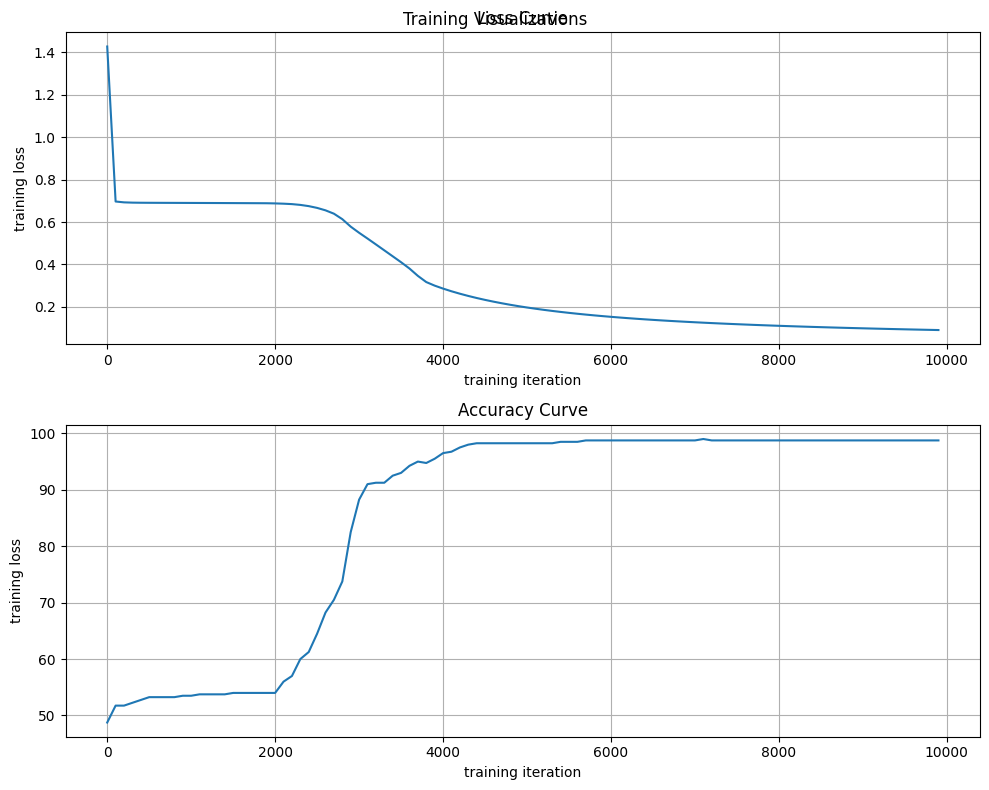

In [8]:
model.plot_curves()

In [9]:
# accuracy_score(y_test.reshape(1, -1), yhat)
accuracy = accuracy_score(y_test, yhat)
print(f"Accuracy score = {accuracy:.4f}")

Accuracy score = 99.0000
